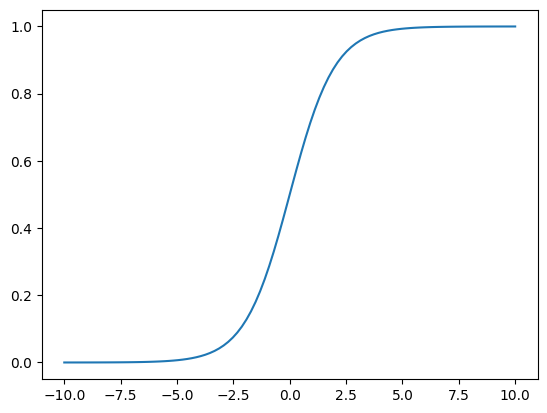

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.linspace(-10,10,100)
z = 1/(1+np.exp(-x))

plt.plot(x,z)
plt.show()

In [ ]:
1/(1+np.exp(-0))

0.5

In [ ]:
1. Quantitative Evaluation - MSE - Mean Squared Error - 609 - Number that says the difference bet pred and actual - Loss - value that model would use for BP
2. Qualitative Evaluation - R2 - Percentage / fraction - 0.69 - that specifies the quality of my model - Metric which you device for human understadning of the performance

In [ ]:
#binary classification
- 0 - 1
- (0, 1)

(0 - 0) - 0
(0 - 1) - 1

(1 - 1) - 0
(1 - 0) - 1

In [1]:
from sklearn.linear_model import LogisticRegression

In [2]:
clf = LogisticRegression(random_state=0) #object of a class

In [5]:
a = 100
def somefun():
  a = 50
  print(a)
  #return a
print(a)
somefun()

100
50


In [ ]:
clf.

In [9]:
#LogisticRegression?
import numpy as np

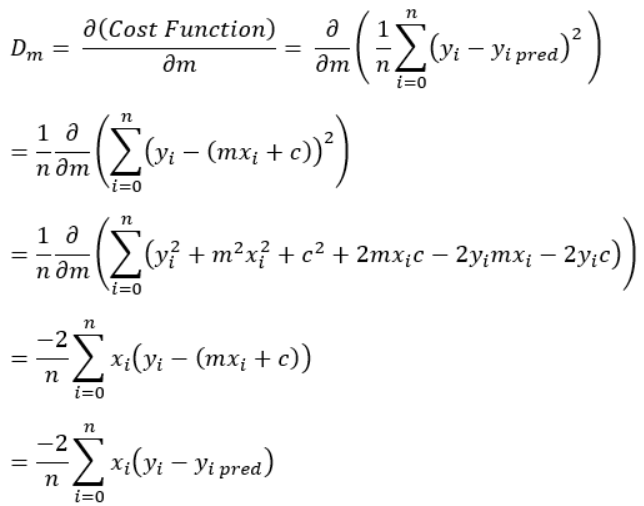

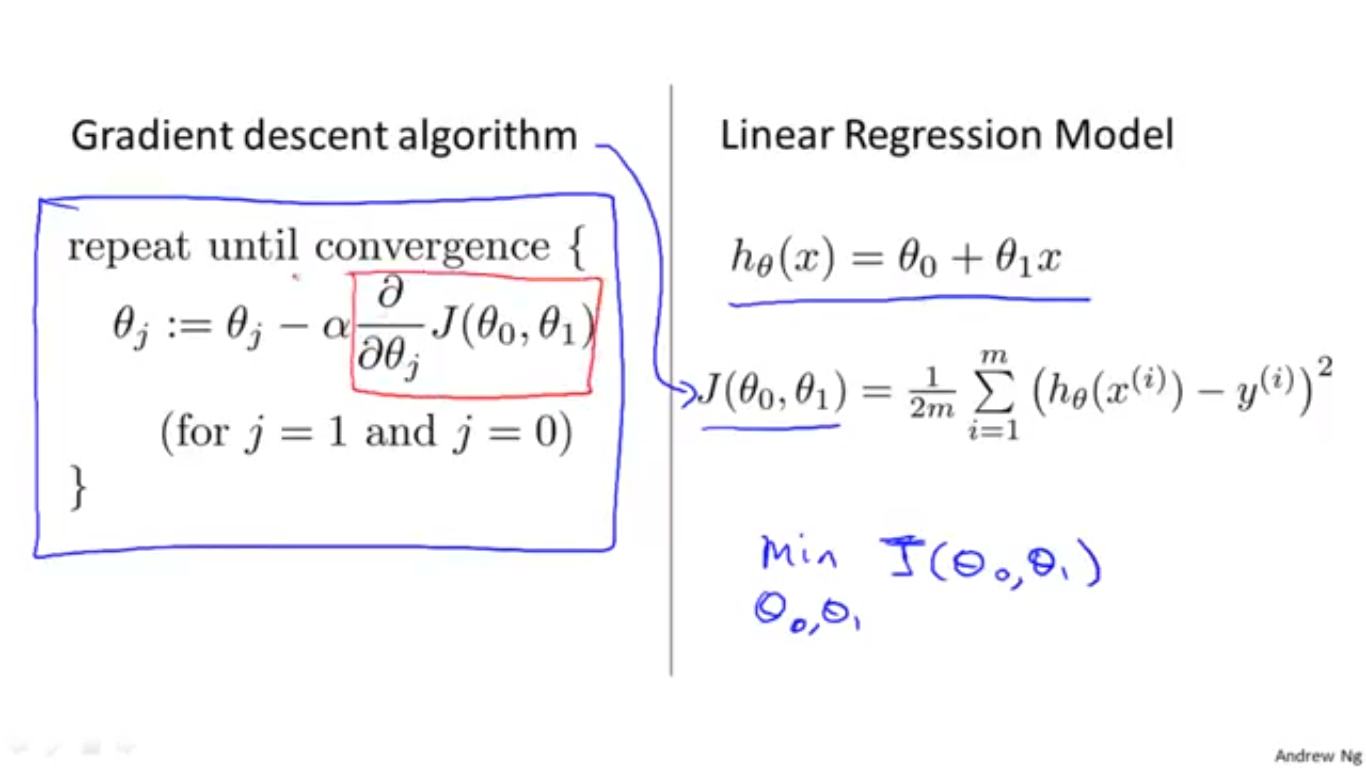

In [15]:
class LogistricRegression:
  def __init__(self,lr=0.01,number_iter = 100000,fit_intecept = True,verbose = True ):
    self.lr = lr
    self.num_iter = number_iter
    self.fit_intercept = fit_intecept
    self.verbose = verbose

  def add_intercept(self, X):
    intercept = np.ones((X.shape[0],1))
    return np.concatenate((intercept,X),axis = 1)

  def sigmoid(self, z):
    #print(self.lr)
    return 1/(1+np.exp(-z))

  def loss(self, ycap,y):
    return (-y * np.log(ycap) - (1-y)*np.log(1-ycap)).mean()

  def fit(self, X, y):
    if self.fit_intercept:
      X = self.add_intercept(X)

    self.slope = np.zeros(X.shape[1])
    for i in range(self.num_iter):
      linearReg_y = np.dot(X,self.slope)
      logisticReg_y = self.sigmoid(linearReg_y)
      gradient = np.dot(X.T, (logisticReg_y - y))/ y.size
      self.slope = (self.slope - (self.lr * gradient))

      linearReg_y = np.dot(X, self.slope)
      logisticReg_y = self.sigmoid(linearReg_y)
      loss = self.loss(logisticReg_y,y)

      if(self.verbose == True and i%10000 == 0):
        print(f'loss: {loss} \t')

  def predict_prob(self,X):
    if self.fit_intercept:
      X = self.add_intercept(X)

    return self.sigmoid(np.dot(X,self.slope))

  def predict(self,X):
    return self.predict_prob(X).round()

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [18]:
iris = datasets.load_iris()

In [19]:
X = iris.data[:,:2]
y = (iris.target !=0 )*1

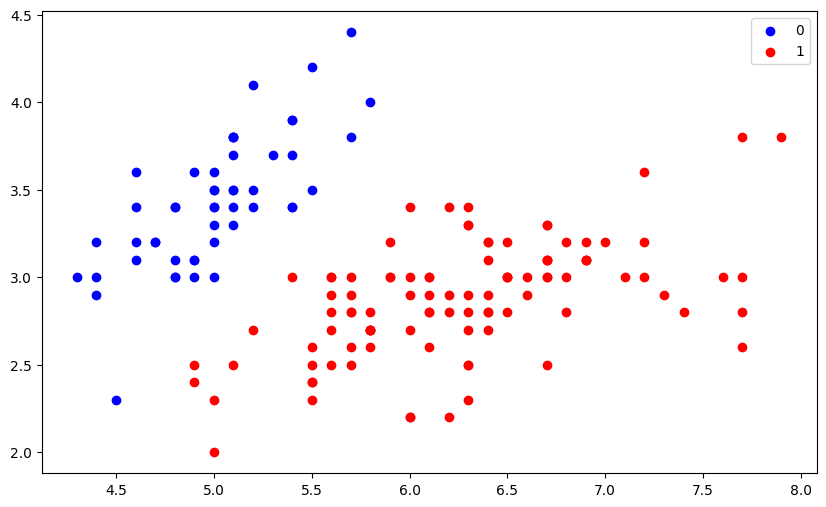

In [22]:
plt.figure(figsize = (10,6))
plt.scatter(X[y==0][:,0], X[y==0][:,1],color = 'b',label = '0')
plt.scatter(X[y==1][:,0], X[y==1][:,1],color = 'r',label = '1')
plt.legend()

In [27]:
model = LogistricRegression(lr = 0.1,number_iter = 300000)
%time model.fit(X,y)

loss: 0.6106904453410645 	
loss: 0.03432718644226481 	
loss: 0.028786652134558194 	
loss: 0.025718548517683595 	
loss: 0.0234084275846366 	
loss: 0.021507024522720488 	
loss: 0.019892368181604787 	
loss: 0.01850316644094787 	
loss: 0.017299193592041302 	
loss: 0.016249738703587712 	
loss: 0.015329838490314536 	
loss: 0.014518833591009705 	
loss: 0.013799605037762758 	
loss: 0.013158006956155608 	
loss: 0.012582374964505335 	
loss: 0.012063092454345647 	
loss: 0.01159221693637487 	
loss: 0.011163166780906657 	
loss: 0.010770464048285635 	
loss: 0.01040952627650971 	
loss: 0.010076499250545106 	
loss: 0.009768123172684332 	
loss: 0.009481625616205837 	
loss: 0.009214635760287606 	
loss: 0.008965115461932587 	
loss: 0.008731303635409624 	
loss: 0.008511671162408238 	
loss: 0.008304884158053576 	
loss: 0.008109773891466244 	
loss: 0.007925312028698183 	
CPU times: user 17.5 s, sys: 92.7 ms, total: 17.6 s
Wall time: 18.7 s


In [28]:
model.slope

array([-25.89066442,  12.523156  , -13.40150447])

In [30]:
preds = model.predict(X)

In [35]:
preds_probs = model.predict_prob(X)

In [ ]:
preds_probs

In [31]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y,preds)

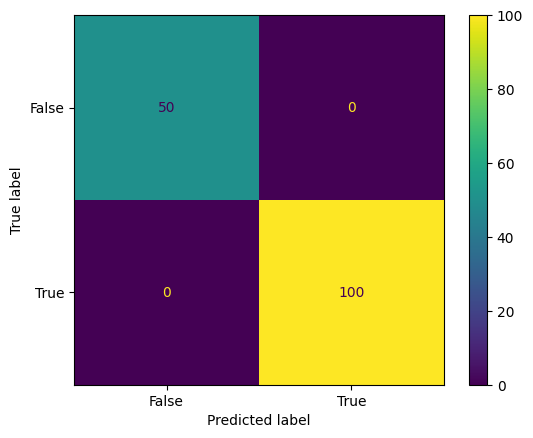

In [34]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels = [False,True])

cm_display.plot()
plt.show()

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y,preds, target_names=['False','True']))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        50
        True       1.00      1.00      1.00       100

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

